In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>


False

In [3]:
class TokenizerUtility:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()

    def tokenize_and_stem(self, text):
        tokens = word_tokenize(text)
        tokens = [self.stemmer.stem(token) for token in tokens if token.isalnum()]
        tokens = [token for token in tokens if token not in self.stop_words]
        return tokens


In [4]:
html_dataset_path = 'html.csv'
html_df = pd.read_csv(html_dataset_path)

In [4]:
html_df.head()

,Category,Data
0,spam,"<!DOCTYPE html>', '', '<html>', '<head>', '<me..."
1,spam,"<!DOCTYPE html><html dir=""ltr"" lang=""en""><head..."
2,spam,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T..."
3,spam,"<meta content=""1; URL=\'https://segurancaitauo..."
4,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01//..."


In [5]:
html_X = html_df['Data'].astype(str)
y = html_df['Category']

In [5]:
html_X_train, html_X_test, y_train, y_test = train_test_split(
    html_X, y, test_size=0.2, random_state=42
)

In [6]:
tokenizer_utility = TokenizerUtility()
html_tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer_utility.tokenize_and_stem, max_features=5000)
html_X_train_tfidf = html_tfidf_vectorizer.fit_transform(html_X_train)
html_X_test_tfidf = html_tfidf_vectorizer.transform(html_X_test)
print(html_X_test_tfidf.todense())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0283887  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.02123022 0.         0.         ... 0.         0.         0.        ]
 [0.05939501 0.         0.         ... 0.         0.         0.05426388]
 [0.01058128 0.         0.         ... 0.         0.         0.        ]]


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Train your model (replace html_X_train_tfidf and html_X_test_tfidf with encoded labels)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(html_X_train_tfidf, y_train_encoded)

# Predict
y_pred_encoded = rf_classifier.predict(html_X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy of random forest classifier with label encoding: {accuracy:.2f}")


Accuracy of random forest classifier with label encoding: 0.96


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from time import time

# Assuming X_train_tfidf is your TF-IDF vectorized training data and y_train are class labels

# Start recording time
start_time = time()

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(html_X_train_tfidf, y_train_encoded)

# End recording time
end_time = time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

test_start=time()
# Make predictions on the test set (assuming you have X_test_tfidf)
y_pred = rf_classifier.predict(html_X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}seconds")

# Calculate overall precision, recall, F1-score, and false positive rate
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test_encoded, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Training Time: 29.36 seconds
testing time: 0.25seconds

Overall Evaluation:
Precision (Micro): 0.9591
Recall (Micro): 0.9591
F1-Score (Micro): 0.9591
False Positive Rate (FPR): 0.0409


In [11]:
start_time = time()
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(html_X_train_tfidf, y_train)
end_time = time()

# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
# Make predictions on the test set using Decision Tree
test_start=time()
y_pred_dt = dt_classifier.predict(html_X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}seconds")

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

Training Time: 45.86 seconds
testing time: 0.02seconds

Overall Evaluation:
Precision (Micro): 0.9367
Recall (Micro): 0.9367
F1-Score (Micro): 0.9367
False Positive Rate (FPR): 0.0633


In [12]:
from time import time
from sklearn.metrics import precision_recall_fscore_support
start_time = time()
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(html_X_train_tfidf, y_train)
end_time = time()
test_start=time()
# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(html_X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}seconds")


# Calculate training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


testing time: 56.40seconds
Training Time: 342.81 seconds

Overall Evaluation:
Precision (Micro): 0.9453
Recall (Micro): 0.9453
F1-Score (Micro): 0.9453
False Positive Rate (FPR): 0.0547


In [13]:
start_time = time()
nb_classifier = MultinomialNB()
nb_classifier.fit(html_X_train_tfidf, y_train)
end_time = time()
test_start=time()
y_pred_nb = nb_classifier.predict(html_X_test_tfidf)
test_end=time()
test=test_end-test_start
print(f"testing time: {test:.2f}seconds")
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")

testing time: 0.01seconds
Training Time: 0.07 seconds

Overall Evaluation:
Precision (Micro): 0.8757
Recall (Micro): 0.8757
F1-Score (Micro): 0.8757


In [8]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset

# Define the classifiers
classifiers = {
    
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n{name}")

    # Training
    train_start_time = time.time()
    clf.fit(html_X_train_tfidf, y_train)
    train_end_time = time.time()
    training_time = train_end_time - train_start_time
    print(f"Training Time: {training_time:.2f} seconds")

    # Testing
    test_start_time = time.time()
    y_pred = clf.predict(html_X_test_tfidf)
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time
    print(f"Testing Time: {testing_time:.2f} seconds")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-Score, False Positive Rate
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
    fpr = 1 - recall

    print(f"Precision (Micro): {precision:.4f}")
    print(f"Recall (Micro): {recall:.4f}")
    print(f"F1-Score (Micro): {f1_score:.4f}")
    print(f"False Positive Rate (FPR): {fpr:.4f}")



Logistic Regression
Training Time: 0.97 seconds
Testing Time: 0.00 seconds
Accuracy: 0.9350
Precision (Micro): 0.9350
Recall (Micro): 0.9350
F1-Score (Micro): 0.9350
False Positive Rate (FPR): 0.0650

K-Nearest Neighbors
Training Time: 0.02 seconds
Testing Time: 789.69 seconds
Accuracy: 0.8692
Precision (Micro): 0.8692
Recall (Micro): 0.8692
F1-Score (Micro): 0.8692
False Positive Rate (FPR): 0.1308

Gradient Boosting
Training Time: 130.88 seconds
Testing Time: 0.02 seconds
Accuracy: 0.9241
Precision (Micro): 0.9241
Recall (Micro): 0.9241
F1-Score (Micro): 0.9241
False Positive Rate (FPR): 0.0759

AdaBoost
Training Time: 69.18 seconds
Testing Time: 0.85 seconds
Accuracy: 0.9285
Precision (Micro): 0.9285
Recall (Micro): 0.9285
F1-Score (Micro): 0.9285
False Positive Rate (FPR): 0.0715


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_dataset_path = 'html.csv'
html_df = pd.read_csv(html_dataset_path)

# Splitting data into train and test sets
html_X = html_df['Data'].astype(str)
y = html_df['Category']
html_X_train, html_X_test, y_train, y_test = train_test_split(html_X, y, test_size=0.2, random_state=42)

# One-hot encoding
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
html_X_train_one_hot = one_hot_encoder.fit_transform(html_X_train.values.reshape(-1, 1))
html_X_test_one_hot = one_hot_encoder.transform(html_X_test.values.reshape(-1, 1))

# Training a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(html_X_train_one_hot, y_train)
y_pred = rf_classifier.predict(html_X_test_one_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of random forest classifier with one-hot encoding: {accuracy:.2f}")


In [11]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(html_X_train_tfidf, y_train)

# Make predictions on the test set using Decision Tree
y_pred_dt = dt_classifier.predict(html_X_test_tfidf)

# Train a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(html_X_train_tfidf, y_train)

# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(html_X_test_tfidf)
nb_classifier = MultinomialNB()
nb_classifier.fit(html_X_train_tfidf, y_train)

# Make predictions on the test set using Naive Bayes
y_pred_nb = nb_classifier.predict(html_X_test_tfidf)

# Train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(html_X_train_tfidf, y_train)



accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")


Decision Tree Accuracy: 0.94
SVM Accuracy: 0.95
Naive Bayes Accuracy: 0.88


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder

# Assuming url_df is your DataFrame containing 'Data' and 'Category' columns
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Custom Tokenizer (optional, replace with your implementation if needed)
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length (optional, consider experimenting)
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Embedding layer (optional, experiment with embedding dimensions)
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(html_padded, y_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model (on validation set or 

Epoch 1/10
1078/1135 [===========================>..] - ETA: 3:15 - loss: 0.2403 - accuracy: 0.9070

KeyboardInterrupt: 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import time

# Enable mixed precision training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenizer for HTML data
html_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into training and testing sets
html_padded_train, html_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Define the CNN model
html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, 128)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)
dense1 = Dense(128, activation='relu')(html_flat)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=html_in, outputs=final_output)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
    history = model.fit(html_padded_train, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Start recording testing time
test_start = time.time()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(html_padded_test, y_test)

# End recording testing time
test_end = time.time()

# Calculate testing time
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/20


2024-05-26 18:38:25.380644: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/anaconda3/lib/python3.11/site-packages/tensorflow/python/framework/indexed_slices.py:459: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 315880832 elements. This may consume a large amount of memory.
  warnings.warn(


114/114 [==============================] - 500s 4s/step - loss: 0.2434 - accuracy: 0.9022 - val_loss: 0.1573 - val_accuracy: 0.9430
Epoch 2/20
114/114 [==============================] - 510s 4s/step - loss: 0.0916 - accuracy: 0.9680 - val_loss: 0.1393 - val_accuracy: 0.9532
Epoch 3/20
114/114 [==============================] - 538s 5s/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.1797 - val_accuracy: 0.9499
Epoch 4/20
114/114 [==============================] - 528s 5s/step - loss: 0.0167 - accuracy: 0.9961 - val_loss: 0.1753 - val_accuracy: 0.9528
Epoch 5/20
114/114 [==============================] - 529s 5s/step - loss: 0.0129 - accuracy: 0.9971 - val_loss: 0.1773 - val_accuracy: 0.9493
Epoch 6/20
114/114 [==============================] - 551s 5s/step - loss: 0.0096 - accuracy: 0.9980 - val_loss: 0.2242 - val_accuracy: 0.9545
Epoch 7/20
114/114 [==============================] - 546s 5s/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.2030 - val_accuracy: 0.9517
Training t

In [8]:
loss, accuracy = model.evaluate(html_padded, y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)


Loss: 0.08171766251325607
Accuracy: 0.9868203401565552


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenizer for HTML data
html_tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
html_tokenizer.fit_on_texts(html_text)
html_sequences = html_tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into training and testing sets
html_padded_train, html_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Define the CNN model
html_in = Input(shape=(max_len,))
html_embedding = Embedding(len(html_tokenizer.word_index) + 1, 128)(html_in)
html_conv = Conv1D(32, kernel_size=3, activation='relu')(html_embedding)
html_pool = MaxPooling1D(pool_size=2)(html_conv)
html_flat = Flatten()(html_pool)
dense1 = Dense(128, activation='relu')(html_flat)  # First hidden layer
dense2 = Dense(64, activation='relu')(dense1)  # Second hidden layer (adjust as needed)
final_output = Dense(len(encoder.classes_), activation='softmax')(dense2)

model = Model(inputs=html_in, outputs=final_output)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model with GPU, early stopping, and Adam optimizer
with tf.device('/GPU:0'):
    history = model.fit(html_padded_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Start recording testing time
test_start = time.time()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(html_padded_test, y_test)

# End recording testing time
test_end = time.time()

# Calculate testing time
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Num GPUs Available:  0


Epoch 1/20
 33/227 [===>..........................] - ETA: 10:11 - loss: 0.4288 - accuracy: 0.8071

KeyboardInterrupt: 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import time
from sklearn.model_selection import train_test_split

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Custom Tokenizer
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')

# Split data into training and testing sets
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define Adam optimizer
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed

# Compile the model with Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with Adam optimizer and batch size 128
history = model.fit(data_padded_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# End recording time
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Start recording testing time
test_start = time.time()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)

# End recording testing time
test_end = time.time()

# Calculate testing time
testing_time = test_end - test_start
print(f"Testing time: {testing_time:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Epoch 1/10
 63/227 [=======>......................] - ETA: 8:46 - loss: 0.5369 - accuracy: 0.7388

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)
# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
import time
start_time = time.time()
# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Custom Tokenizer (optional, replace with your implementation if needed)
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length (optional, consider experimenting)
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)
# Embedding layer (optional, experiment with embedding dimensions)
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with SGD optimizer and batch size 128
history = model.fit(data_padded_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Extract training and validation accuracy from history

end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

test_start=time.time()
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end=time.time()
test=test_end-test_start
print(f"Testing time: {test:.2f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")


Epoch 1/10
227/227 [==============================] - 5s 12ms/step - loss: 0.3753 - accuracy: 0.8362 - val_loss: 0.2779 - val_accuracy: 0.8857
Epoch 2/10
227/227 [==============================] - 2s 9ms/step - loss: 0.2655 - accuracy: 0.8943 - val_loss: 0.2535 - val_accuracy: 0.8977
Epoch 3/10
227/227 [==============================] - 2s 9ms/step - loss: 0.2376 - accuracy: 0.9063 - val_loss: 0.2384 - val_accuracy: 0.9087
Epoch 4/10
227/227 [==============================] - 2s 9ms/step - loss: 0.2108 - accuracy: 0.9194 - val_loss: 0.2477 - val_accuracy: 0.9081
Epoch 5/10
227/227 [==============================] - 2s 9ms/step - loss: 0.1912 - accuracy: 0.9292 - val_loss: 0.2148 - val_accuracy: 0.9186
Epoch 6/10
227/227 [==============================] - 2s 10ms/step - loss: 0.1821 - accuracy: 0.9309 - val_loss: 0.2128 - val_accuracy: 0.9172
Epoch 7/10
227/227 [==============================] - 2s 9ms/step - loss: 0.1667 - accuracy: 0.9363 - val_loss: 0.2228 - val_accuracy: 0.9215
Epoc

In [12]:
loss, accuracy = model.evaluate(html_padded, y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.13035063445568085
Accuracy: 0.9562735557556152


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense, BatchNormalization, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
import time
from sklearn.metrics import precision_recall_fscore_support

start_time = time.time()
# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Custom Tokenizer (optional, replace with your implementation if needed)
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length (optional, consider experimenting)
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer (optional, experiment with embedding dimensions)
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the CNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())  # Added BatchNormalization after Conv1D
model.add(MaxPooling1D(pool_size=2))
# Added another Conv1D layer with Dropout
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))  # Added Dropout after Conv2D
model.add(MaxPooling1D(pool_size=2))
# Replace Flatten with GlobalMaxPooling1D
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with SGD optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with SGD optimizer and batch size 128
history = model.fit(data_padded_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Extract training and validation accuracy from history

end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
# Evaluate the model on the test set
test_time=time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end=time.time()
test=test_end-test_start
print(f"Testing time: {test:.2f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Accessing the training history to get validation accuracy
validation_accuracy = history.history['val_accuracy']
print(f"Validation Accuracy: {validation_accuracy[-1]:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)
# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

# Calculate training time


2024-05-20 19:44:07.868132: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
227/227 [==============================] - 5s 15ms/step - loss: 0.3610 - accuracy: 0.8475 - val_loss: 0.4566 - val_accuracy: 0.7178
Epoch 2/10
227/227 [==============================] - 3s 13ms/step - loss: 0.2433 - accuracy: 0.9035 - val_loss: 0.3688 - val_accuracy: 0.8434
Epoch 3/10
227/227 [==============================] - 3s 13ms/step - loss: 0.2072 - accuracy: 0.9211 - val_loss: 0.2904 - val_accuracy: 0.8905
Epoch 4/10
227/227 [==============================] - 3s 15ms/step - loss: 0.1907 - accuracy: 0.9265 - val_loss: 0.2460 - val_accuracy: 0.9264
Epoch 5/10
227/227 [==============================] - 4s 17ms/step - loss: 0.1744 - accuracy: 0.9336 - val_loss: 0.2114 - val_accuracy: 0.9326
Epoch 6/10
227/227 [==============================] - 3s 15ms/step - loss: 0.1623 - accuracy: 0.9384 - val_loss: 0.2325 - val_accuracy: 0.9143
Epoch 7/10
227/227 [==============================] - 3s 14ms/step - loss: 0.1462 - accuracy: 0.9462 - val_loss: 0.2974 - val_accuracy: 0.8725

In [6]:
loss, accuracy = model.evaluate(html_padded, y_encoded, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.1509169191122055
Accuracy: 0.9624446034431458


1418/1418 [==============================] - 1s 1ms/step
Confusion Matrix:
[[18078  4609]
 [  352 22334]]


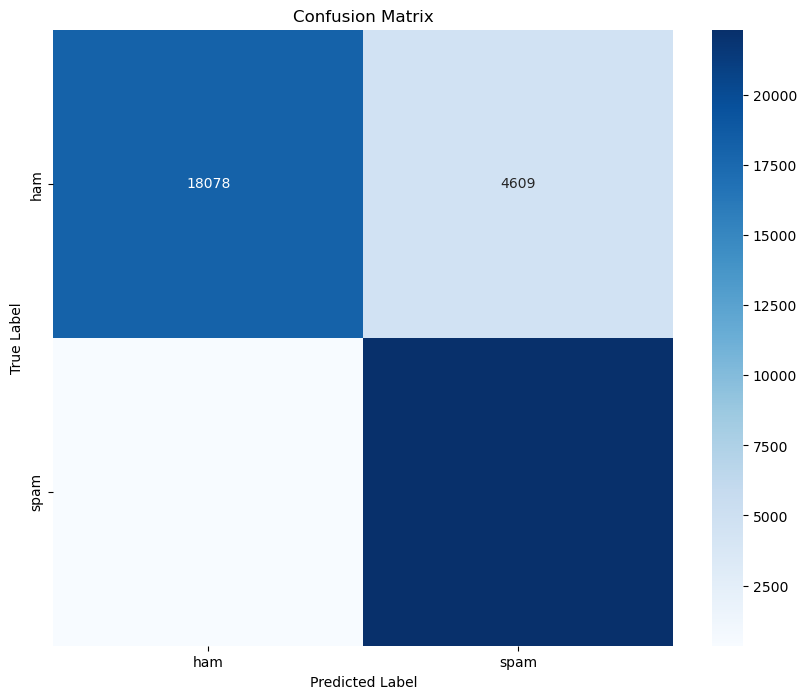

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Get predictions for validation data
predictions = model.predict(html_padded)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_encoded, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


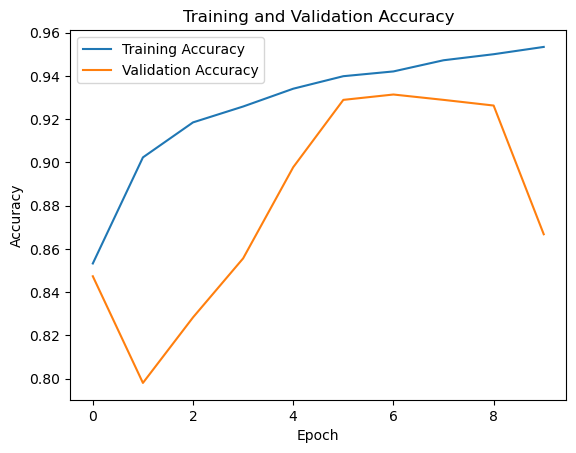

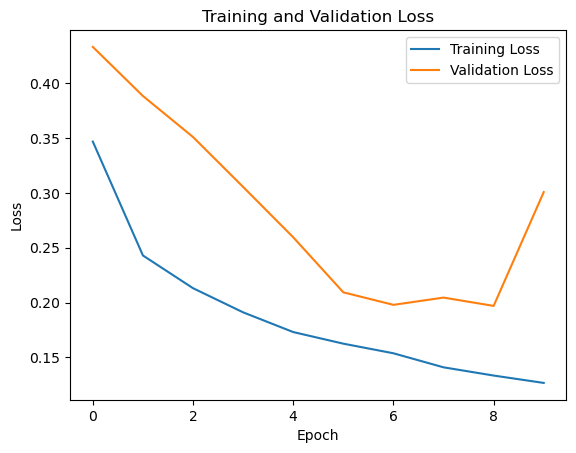

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_df = pd.read_csv('html.csv')  # Add this line to read the CSV file
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(LSTM(128, return_sequences=True))  # First LSTM layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout
model.add(LSTM(64))  # Second LSTM layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Testing time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 00:47:23.755816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:47:23.757294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:47:23.758086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 00:47:24.950169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:47:24.952791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:47:24.955118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3619 - accuracy: 0.8462

2024-05-23 00:49:30.224875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 00:49:30.226417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 00:49:30.227672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 139s 474ms/step - loss: 0.3619 - accuracy: 0.8462 - val_loss: 0.3422 - val_accuracy: 0.8501
Epoch 2/30
227/227 [==============================] - 125s 549ms/step - loss: 0.3059 - accuracy: 0.8791 - val_loss: 0.3250 - val_accuracy: 0.8656
Epoch 3/30
227/227 [==============================] - 111s 491ms/step - loss: 0.2866 - accuracy: 0.8874 - val_loss: 0.2842 - val_accuracy: 0.8895
Epoch 4/30
227/227 [==============================] - 113s 498ms/step - loss: 0.2699 - accuracy: 0.8965 - val_loss: 0.3814 - val_accuracy: 0.8114
Epoch 5/30
227/227 [==============================] - 116s 513ms/step - loss: 0.2546 - accuracy: 0.9041 - val_loss: 0.3298 - val_accuracy: 0.8584
Epoch 6/30
227/227 [==============================] - 121s 535ms/step - loss: 0.2372 - accuracy: 0.9097 - val_loss: 1.0031 - val_accuracy: 0.5866
Epoch 7/30
227/227 [==============================] - 113s 496ms/step - loss: 0.2236 - accuracy: 0.9144 - val_loss: 0.2909 - val_accura

2024-05-23 01:03:31.462791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 01:03:31.464136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 01:03:31.465135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 37s 129ms/step

Overall Evaluation:
Precision (Micro): 0.8917
Recall (Micro): 0.8917
F1-Score (Micro): 0.8917
False Positive Rate (FPR): 0.1083


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_df = pd.read_csv('html.csv')
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(SimpleRNN(128, return_sequences=True))  # First RNN layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout
model.add(SimpleRNN(64))  # Second RNN layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Testing time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Epoch 1/30
227/227 [==============================] - 28s 88ms/step - loss: 0.3960 - accuracy: 0.8315 - val_loss: 0.4660 - val_accuracy: 0.7773
Epoch 2/30
227/227 [==============================] - 19s 84ms/step - loss: 0.3354 - accuracy: 0.8655 - val_loss: 0.4843 - val_accuracy: 0.8136
Epoch 3/30
227/227 [==============================] - 21s 94ms/step - loss: 0.3329 - accuracy: 0.8613 - val_loss: 0.3550 - val_accuracy: 0.8493
Epoch 4/30
227/227 [==============================] - 21s 91ms/step - loss: 0.3135 - accuracy: 0.8742 - val_loss: 0.3716 - val_accuracy: 0.8510
Epoch 5/30
227/227 [==============================] - 23s 103ms/step - loss: 0.3002 - accuracy: 0.8814 - val_loss: 0.3449 - val_accuracy: 0.8629
Epoch 6/30
227/227 [==============================] - 22s 98ms/step - loss: 0.2950 - accuracy: 0.8863 - val_loss: 0.8593 - val_accuracy: 0.5120
Epoch 7/30
227/227 [==============================] - 23s 103ms/step - loss: 0.2970 - accuracy: 0.8853 - val_loss: 0.3162 - val_accurac

NameError: name 'data_paded_test' is not defined

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_df = pd.read_csv('html.csv')
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the GRU model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(GRU(128, return_sequences=True))  # First GRU layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout
model.add(GRU(64))  # Second GRU layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Testing time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 02:10:01.255167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:10:01.259226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:10:01.264446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 02:10:01.851886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:10:01.852760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:10:01.853926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3731 - accuracy: 0.8454

2024-05-23 02:11:00.821688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:11:00.822672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:11:00.823103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 64s 175ms/step - loss: 0.3731 - accuracy: 0.8454 - val_loss: 0.3579 - val_accuracy: 0.8427
Epoch 2/30
227/227 [==============================] - 65s 286ms/step - loss: 0.3191 - accuracy: 0.8733 - val_loss: 0.3321 - val_accuracy: 0.8631
Epoch 3/30
227/227 [==============================] - 51s 225ms/step - loss: 0.2913 - accuracy: 0.8838 - val_loss: 0.3849 - val_accuracy: 0.8280
Epoch 4/30
227/227 [==============================] - 49s 214ms/step - loss: 0.2681 - accuracy: 0.8925 - val_loss: 0.3053 - val_accuracy: 0.8663
Epoch 5/30
227/227 [==============================] - 47s 207ms/step - loss: 0.2530 - accuracy: 0.8977 - val_loss: 0.3556 - val_accuracy: 0.8434
Epoch 6/30
227/227 [==============================] - 48s 212ms/step - loss: 0.2380 - accuracy: 0.9040 - val_loss: 0.2834 - val_accuracy: 0.8769
Epoch 7/30
227/227 [==============================] - 50s 221ms/step - loss: 0.2341 - accuracy: 0.9068 - val_loss: 0.2281 - val_accuracy: 0.9

2024-05-23 02:20:31.618565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:20:31.619566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:20:31.620121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 7s 22ms/step

Overall Evaluation:
Precision (Micro): 0.9143
Recall (Micro): 0.9143
F1-Score (Micro): 0.9143
False Positive Rate (FPR): 0.0857


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_df = pd.read_csv('html.csv')
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the Bi-LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Bidirectional(LSTM(128, return_sequences=True)))  # First Bi-LSTM layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout
model.add(Bidirectional(LSTM(64)))  # Second Bi-LSTM layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Testing time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 03:01:22.071397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 03:01:22.076092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 03:01:22.076454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 03:01:22.693554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 03:01:22.694262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 03:01:22.694760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 03:01:24.264722: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 03:01:24.265535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 03:01:24.266097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8480

2024-05-23 03:02:59.862009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 03:02:59.863925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 03:02:59.865158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 108s 447ms/step - loss: 0.3520 - accuracy: 0.8480 - val_loss: 0.3053 - val_accuracy: 0.8729
Epoch 2/30
227/227 [==============================] - 96s 421ms/step - loss: 0.2837 - accuracy: 0.8816 - val_loss: 0.3280 - val_accuracy: 0.8558
Epoch 3/30
227/227 [==============================] - 95s 419ms/step - loss: 0.2556 - accuracy: 0.8972 - val_loss: 0.2619 - val_accuracy: 0.8997
Epoch 4/30
227/227 [==============================] - 99s 438ms/step - loss: 0.2417 - accuracy: 0.9044 - val_loss: 1.1338 - val_accuracy: 0.5492
Epoch 5/30
227/227 [==============================] - 96s 423ms/step - loss: 0.2298 - accuracy: 0.9087 - val_loss: 0.2481 - val_accuracy: 0.9008
Epoch 6/30
227/227 [==============================] - 95s 421ms/step - loss: 0.2194 - accuracy: 0.9153 - val_loss: 0.2392 - val_accuracy: 0.9070
Epoch 7/30
227/227 [==============================] - 95s 421ms/step - loss: 0.2070 - accuracy: 0.9220 - val_loss: 0.2302 - val_accuracy: 0.

2024-05-23 03:23:51.870033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 03:23:51.872076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 03:23:51.873113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 14s 44ms/step

Overall Evaluation:
Precision (Micro): 0.9217
Recall (Micro): 0.9217
F1-Score (Micro): 0.9217
False Positive Rate (FPR): 0.0783


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_df = pd.read_csv('html.csv')
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the Bi-GRU model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Bidirectional(GRU(128, return_sequences=True)))  # First Bi-GRU layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout
model.add(Bidirectional(GRU(64)))  # Second Bi-GRU layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Testing time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


2024-05-23 02:22:39.654104: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:22:39.664870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:22:39.665294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2024-05-23 02:22:40.434281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:22:40.434815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:22:40.435302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-23 02:23:01.861964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:23:01.862761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:23:01.863527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.8427

2024-05-23 02:24:20.590856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:24:20.592771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:24:20.594113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

227/227 [==============================] - 115s 370ms/step - loss: 0.3572 - accuracy: 0.8427 - val_loss: 0.3079 - val_accuracy: 0.8726
Epoch 2/30
227/227 [==============================] - 86s 378ms/step - loss: 0.2945 - accuracy: 0.8785 - val_loss: 0.2850 - val_accuracy: 0.8800
Epoch 3/30
227/227 [==============================] - 82s 362ms/step - loss: 0.2728 - accuracy: 0.8865 - val_loss: 0.2715 - val_accuracy: 0.8847
Epoch 4/30
227/227 [==============================] - 83s 364ms/step - loss: 0.2584 - accuracy: 0.8940 - val_loss: 0.3251 - val_accuracy: 0.8752
Epoch 5/30
227/227 [==============================] - 84s 369ms/step - loss: 0.2438 - accuracy: 0.8992 - val_loss: 0.2541 - val_accuracy: 0.8941
Epoch 6/30
227/227 [==============================] - 85s 377ms/step - loss: 0.2320 - accuracy: 0.9071 - val_loss: 0.2625 - val_accuracy: 0.8916
Epoch 7/30
227/227 [==============================] - 86s 380ms/step - loss: 0.2230 - accuracy: 0.9108 - val_loss: 0.2404 - val_accuracy: 0.

2024-05-23 02:56:06.265802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-23 02:56:06.267260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-23 02:56:06.268120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

284/284 [==============================] - 13s 43ms/step

Overall Evaluation:
Precision (Micro): 0.9322
Recall (Micro): 0.9322
F1-Score (Micro): 0.9322
False Positive Rate (FPR): 0.0678


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import time

# Start recording time
start_time = time.time()

# Assuming html_df is your DataFrame containing 'Data' and 'Category' columns
html_df = pd.read_csv('html.csv')
html_text = html_df['Data'].tolist()
y = html_df['Category']

# Label encoding for target variable (assuming categories)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(html_text)
html_sequences = tokenizer.texts_to_sequences(html_text)

# Pad sequences to a fixed length
max_len = 100  # Adjust max_len as needed
html_padded = pad_sequences(html_sequences, maxlen=max_len, padding='post')
data_padded_train, data_padded_test, y_train, y_test = train_test_split(html_padded, y_encoded, test_size=0.2, random_state=42)

# Embedding layer configuration
embedding_dim = 128  # Adjust embedding_dim as needed
embedding_matrix = np.random.rand(len(tokenizer.word_index) + 1, embedding_dim)  # Initialize randomly

# Define the ANN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_dim, input_length=max_len, embeddings_initializer=Constant(embedding_matrix)))  # Use pre-trained embeddings if available
model.add(Flatten())  # Flatten the input
model.add(Dense(256, activation='relu'))  # Fully connected layer
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Add Dropout
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer with number of classes

# Define SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(data_padded_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Evaluate the model on the test set
test_start = time.time()
test_loss, test_accuracy = model.evaluate(data_padded_test, y_test)
test_end = time.time()
test_duration = test_end - test_start
print(f"Testing time: {test_duration:.2f} seconds")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on test set
y_pred = np.argmax(model.predict(data_padded_test), axis=-1)

# Calculate precision, recall, F1-score, and FPR for all classes
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')
fpr = 1 - recall

# Print overall evaluation metrics
print("\nOverall Evaluation:")
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1-Score (Micro): {f1_score:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")


Epoch 1/30
227/227 [==============================] - 11s 28ms/step - loss: 0.3158 - accuracy: 0.8752 - val_loss: 0.2391 - val_accuracy: 0.9041
Epoch 2/30
227/227 [==============================] - 6s 28ms/step - loss: 0.2146 - accuracy: 0.9179 - val_loss: 0.2202 - val_accuracy: 0.9171
Epoch 3/30
227/227 [==============================] - 6s 24ms/step - loss: 0.1717 - accuracy: 0.9362 - val_loss: 0.2197 - val_accuracy: 0.9248
Epoch 4/30
227/227 [==============================] - 4s 19ms/step - loss: 0.1380 - accuracy: 0.9489 - val_loss: 0.2298 - val_accuracy: 0.9280
Epoch 5/30
227/227 [==============================] - 4s 19ms/step - loss: 0.1151 - accuracy: 0.9571 - val_loss: 0.2764 - val_accuracy: 0.9263
Epoch 6/30
227/227 [==============================] - 5s 20ms/step - loss: 0.0950 - accuracy: 0.9640 - val_loss: 0.2816 - val_accuracy: 0.9182
Epoch 7/30
227/227 [==============================] - 5s 20ms/step - loss: 0.0797 - accuracy: 0.9704 - val_loss: 0.3504 - val_accuracy: 0.881